In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
from scipy.io import loadmat

moons_mat_1 = loadmat("/kaggle/input/moons-data/Two_moons_no_overlap.mat")
moons_mat_2 = loadmat("/kaggle/input/moons-data/Two_moons_no_overlap2.mat")
moons_mat_3 = loadmat("/kaggle/input/moons-data/Two_moons_overlap2.mat")
moons_mat_4 = loadmat("/kaggle/input/moons-data/Two_moons_overlap3.mat")

moons_1_X = moons_mat_1['X']
moons_1_y = moons_mat_1['Y']

moons_2_X = moons_mat_2['X']
moons_2_y = moons_mat_2['Y']

moons_3_X = moons_mat_3['X']
moons_3_y = moons_mat_3['Y']

moons_4_X = moons_mat_4['X']
moons_4_y = moons_mat_4['Y']

In [3]:
class Adaline: 
    def __init__(self, input_size):
        self.weights = np.random.uniform(-0.01, 0.01, size = input_size)
        self.bias = np.random.uniform(-0.01, 0.01)
        
    def activate(self, inputs): 
        """
        Computes the identity function activation 
        for provided inputs, weights, and bias. 
        """
        
        return np.dot(inputs, self.weights) + self.bias 
    
    def update(self, inputs, error, learning_rate):
        self.weights += learning_rate * error * inputs
        self.bias += learning_rate * error

In [4]:
class Madaline: 
    def __init__(self, input_size, hidden_size, output_size=None, learning_rate=0.03, epochs=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.hidden_layer = [Adaline(input_size)] * hidden_size
        
        self.weight_change = float('inf')
        self.errors = []
    
    def predict(self, X):
        predictions = [self.feedforward(x_i) for x_i in X]
        
        return predictions
    
    def feedforward(self, inputs):
        """
        Performs majority vote of the hidden layers. 
        This serves as a prediction.
        """
        
        hidden_output_sum = 0
        
        for adaline_neuron in self.hidden_layer: 
            hidden_input = adaline_neuron.activate(inputs)
            
            if hidden_input >= 0: 
                hidden_output_sum += 1 
                
            else: 
                hidden_output_sum -= 1
                
        majority_vote = 1 if hidden_output_sum > 0 else -1 
        
        return majority_vote
    
    def fit(self, X, y):
        """
        Trains the MADALINE network on data matrix X and 
        response vector y. 
        """
        
        epoch = 0 
        num_samples = X.shape[0]
        
        while epoch < self.epochs: # and self.weight_change > 0.10
            epoch += 1
            epoch_error = 0
            
            for i in range(num_samples):
                x_i, y_i = X[i], y[i]
                y_pred = self.feedforward(x_i)
                
                sample_error = abs(y_i - y_pred)
                epoch_error += sample_error
                                
                if y_pred != y_i: 
                    self._adjust_weights(x_i, y_i)
                    
            avg_epoch_error = epoch_error / num_samples
            self.errors.append(epoch_error)
                
                    
    def _adjust_weights(self, inputs, y_i):
        hidden_outputs = []
        
        for adaline_neuron in self.hidden_layer:
            # Obtain the weighted sum for each Adaline neuron 
            hidden_output = adaline_neuron.activate(inputs)
            hidden_outputs.append(hidden_output)
                    
        # Find the Adaline with the smallest absolute activation
        min_index = np.argmin(np.abs(hidden_outputs))
        min_adaline_neuron = self.hidden_layer[min_index]
        
        error = y_i - np.sign(hidden_outputs[min_index])  
        
        prev_weight_change = np.copy(min_adaline_neuron.weights)
        
        # Flip the output of this Adaline
        min_adaline_neuron.update(inputs, error, self.learning_rate)
        
        # Compute the change in weights
        self.weight_change = np.sum(np.abs(min_adaline_neuron.weights - prev_weight_change))  

# CASE 1 

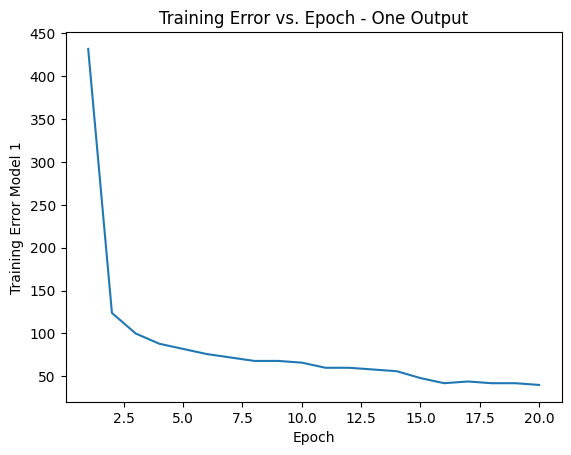

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 

model1 = Madaline(input_size=2, hidden_size=3, epochs=20, learning_rate=0.000001)
model1.fit(moons_1_X, moons_1_y)

plt.plot(range(1, len(model1.errors) + 1), model1.errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error Model 1')
plt.title('Training Error vs. Epoch - One Output')
plt.show()

In [6]:
# y_pred = model1.predict(moons_1_y)

# plt.plot(y_pred)
# plt.xlabel('Epoch')
# plt.ylabel('Training Error Model 1')
# plt.title('Training Error vs. Epoch - One Output')
# plt.show()

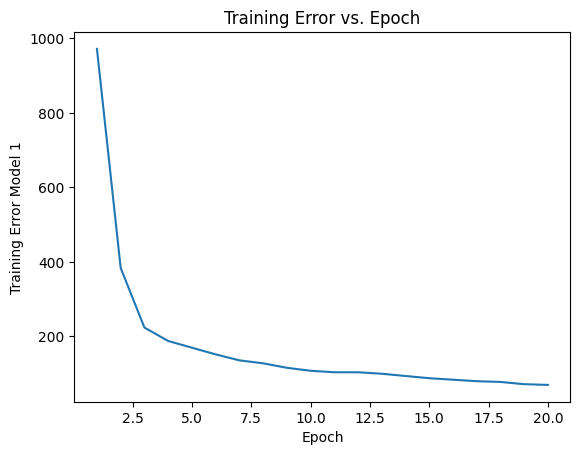

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

model1 = Madaline(input_size=2, hidden_size=3, epochs=20, learning_rate=0.000001)
model1.fit(moons_3_X, moons_3_y)

plt.plot(range(1, len(model1.errors) + 1), model1.errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error Model 1')
plt.title('Training Error vs. Epoch')
plt.show()

# CASE 2 

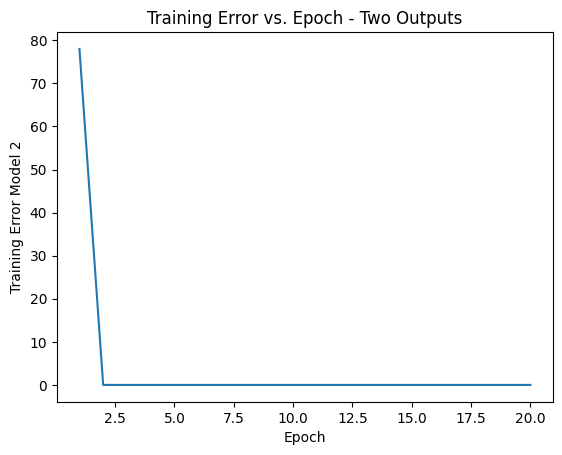

In [8]:
model2 = Madaline(input_size=2, hidden_size=3, output_size=2, epochs=20, learning_rate=0.00001)
model2.fit(moons_2_X, moons_2_y)


plt.plot(range(1, len(model2.errors) + 1), model2.errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error Model 2')
plt.title('Training Error vs. Epoch - Two Outputs')
plt.show()

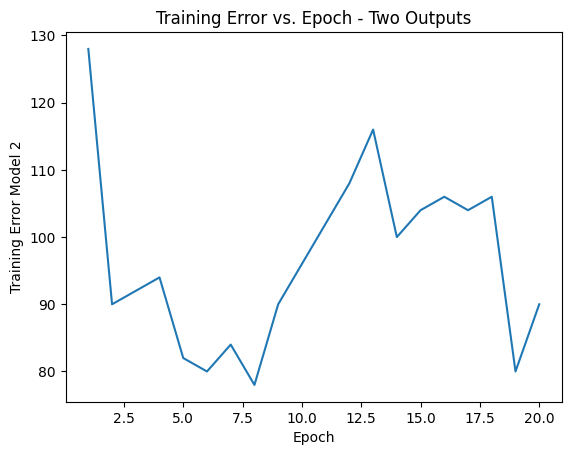

In [9]:
model2 = Madaline(input_size=2, hidden_size=3, output_size=2, epochs=20, learning_rate=0.00001)
model2.fit(moons_4_X, moons_4_y)


plt.plot(range(1, len(model2.errors) + 1), model2.errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error Model 2')
plt.title('Training Error vs. Epoch - Two Outputs')
plt.show()